MLDM Task 1a

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset to perform KNN

dataset = pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
#Checking the Data shape

dataset.shape

(299, 13)

In [4]:
#Exploring the dataset

dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
dataset.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


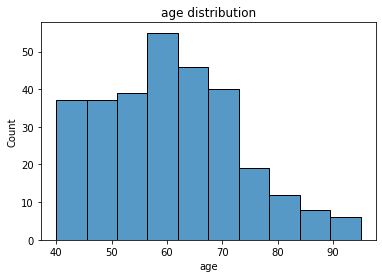

In [8]:
#Utilising seaborn to Age column

sns.histplot(dataset.age)
plt.title('age distribution')
plt.show()

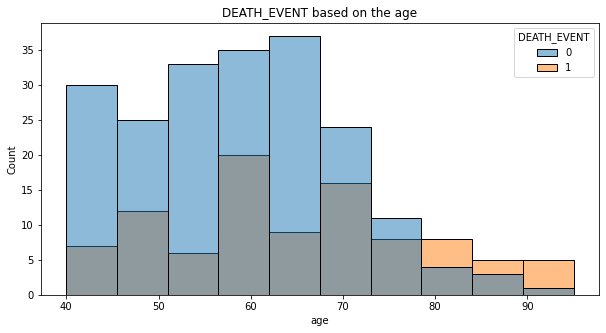

In [9]:
plt.figure(figsize=(10, 5))
plt.title("DEATH_EVENT based on the age")
sns.histplot(x="age", hue="DEATH_EVENT", data=dataset)
plt.show()

In [10]:
#Determining the class feature and input features

X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
y = dataset.iloc[:, 12].values

In [11]:
X.shape

(299, 13)

In [12]:
y.shape

(299,)

In [13]:
#Splitting the dataset into training set and the test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
#Standardizing the train and test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [15]:
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
#Evaluating the model
#Predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
print(y_test)

[0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('-------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classfication Report:\n')
print(result)

accuracy:0.97


Confusion Matrix:
[[62  0]
 [ 3 25]] 


-------------------------------------------------------
classfication Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.89      0.94        28

    accuracy                           0.97        90
   macro avg       0.98      0.95      0.96        90
weighted avg       0.97      0.97      0.97        90



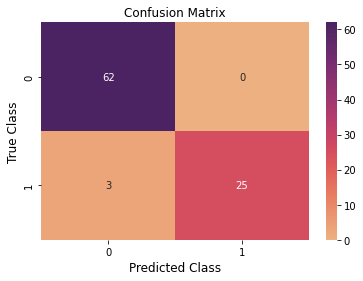

In [19]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()